## Reject sampling

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# https://github.com/Joseph94m/MCMC/blob/master/MCMC.ipynb
# https://angeloyeo.github.io/2020/09/17/MCMC.html

n = 500
min = -7
max = 17

xx = np.linspace(-7, 17, 1000)
xxx = np.linspace(-10, 20, 1000)

target_dist = lambda x : 0.3*np.exp(-0.2*x**2) + 0.7*(np.exp(-0.2*(x-10)**2))

# 제안 분포는 우리가 쉽게 샘플을 추출할 수 있는 분포를 이용해서 생성할 수 있다
# 타겟 분포와 가장 유사한 형태의 제안 분포를 설정하는 것이 좋음(uniform distribution을 쓰는게 제일 편함)

def proposal_dist(x):
    
    if (x < -7) or (x > 17):
        return 0
    else:
        # 상수배
        return 1/24*16.8

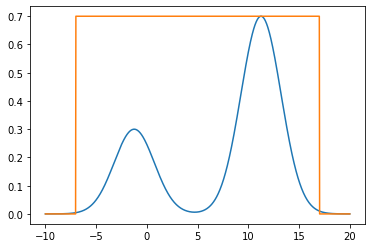

In [2]:
plt.plot(xxx, target_dist(xx))
plt.plot(xxx, [proposal_dist(x) for x in xxx])

In [3]:
accept = []
reject = []

for x in xx:
    
    u = np.random.uniform(0, 0.7)
    
    reject_critera = target_dist(x) / proposal_dist(x)
    
    if u < reject_critera:
        accept.append((x, u))
    else:
        reject.append((x, u))

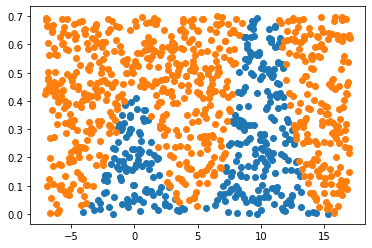

In [4]:
x = np.array(accept)[:, 0]
y = np.array(accept)[:, 1]
plt.scatter(x,y)

x_re = np.array(reject)[:, 0]
y_re = np.array(reject)[:, 1]
plt.scatter(x_re, y_re)